In [1]:
#Diabetic_Prediction_System

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("D:\Swapnil Dixit\Data Science\Models\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.shape

(768, 9)

In [5]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
                                  

In [6]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())


data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

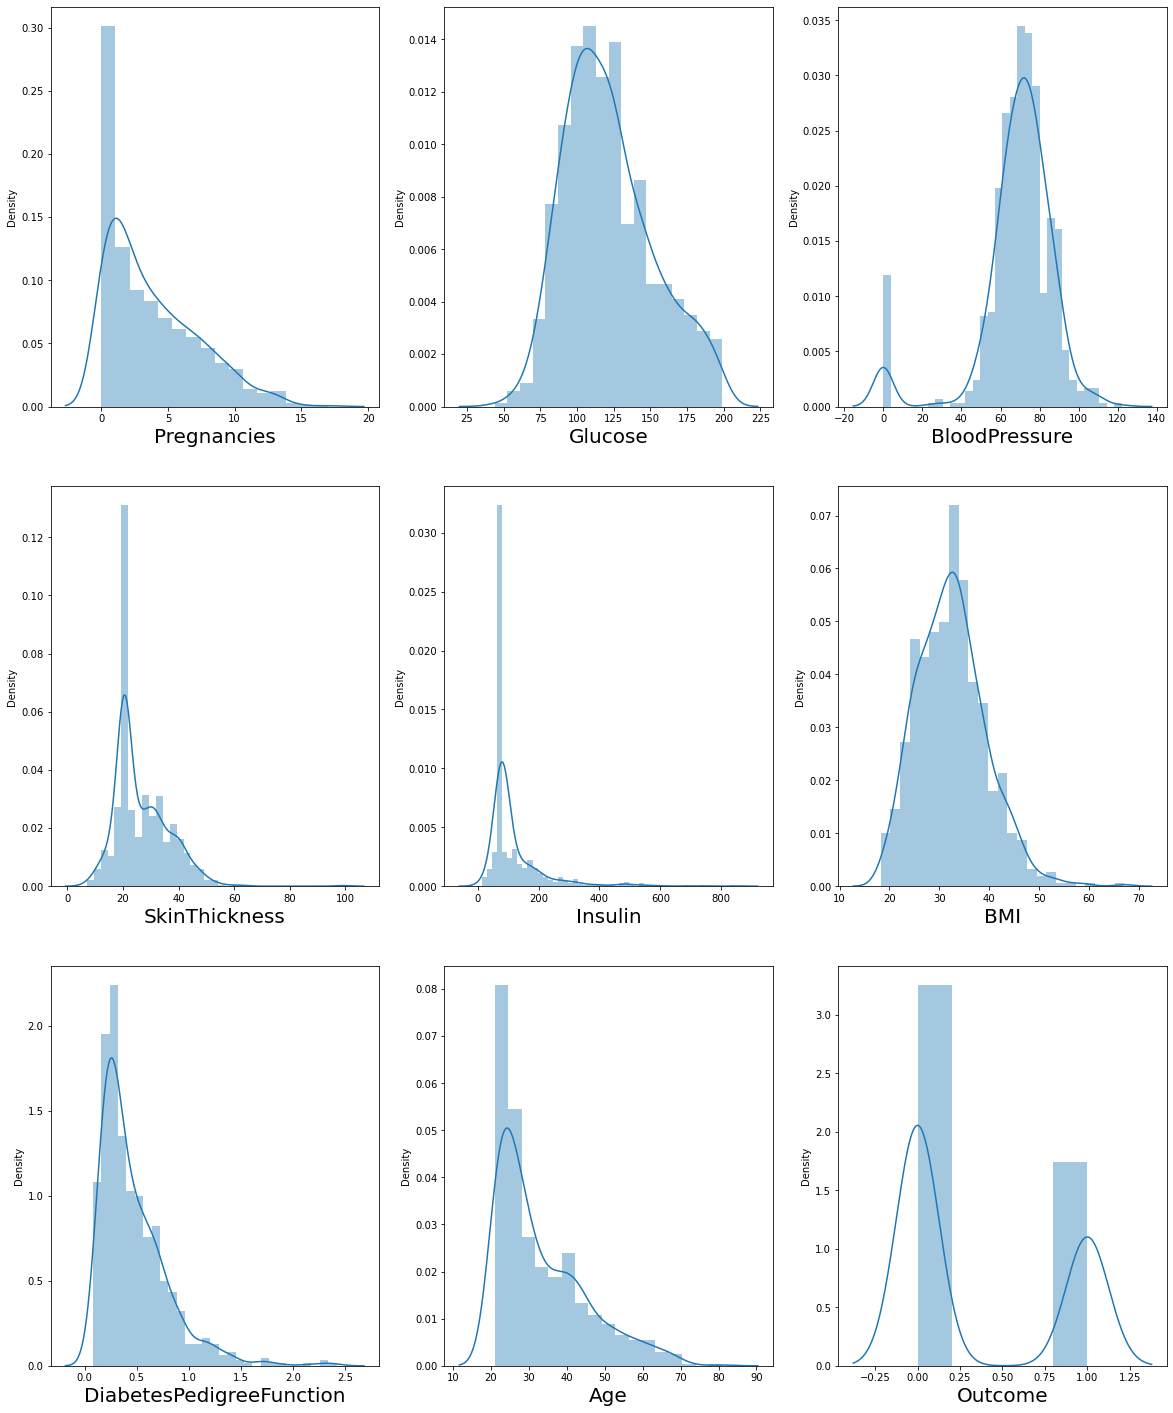

In [7]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

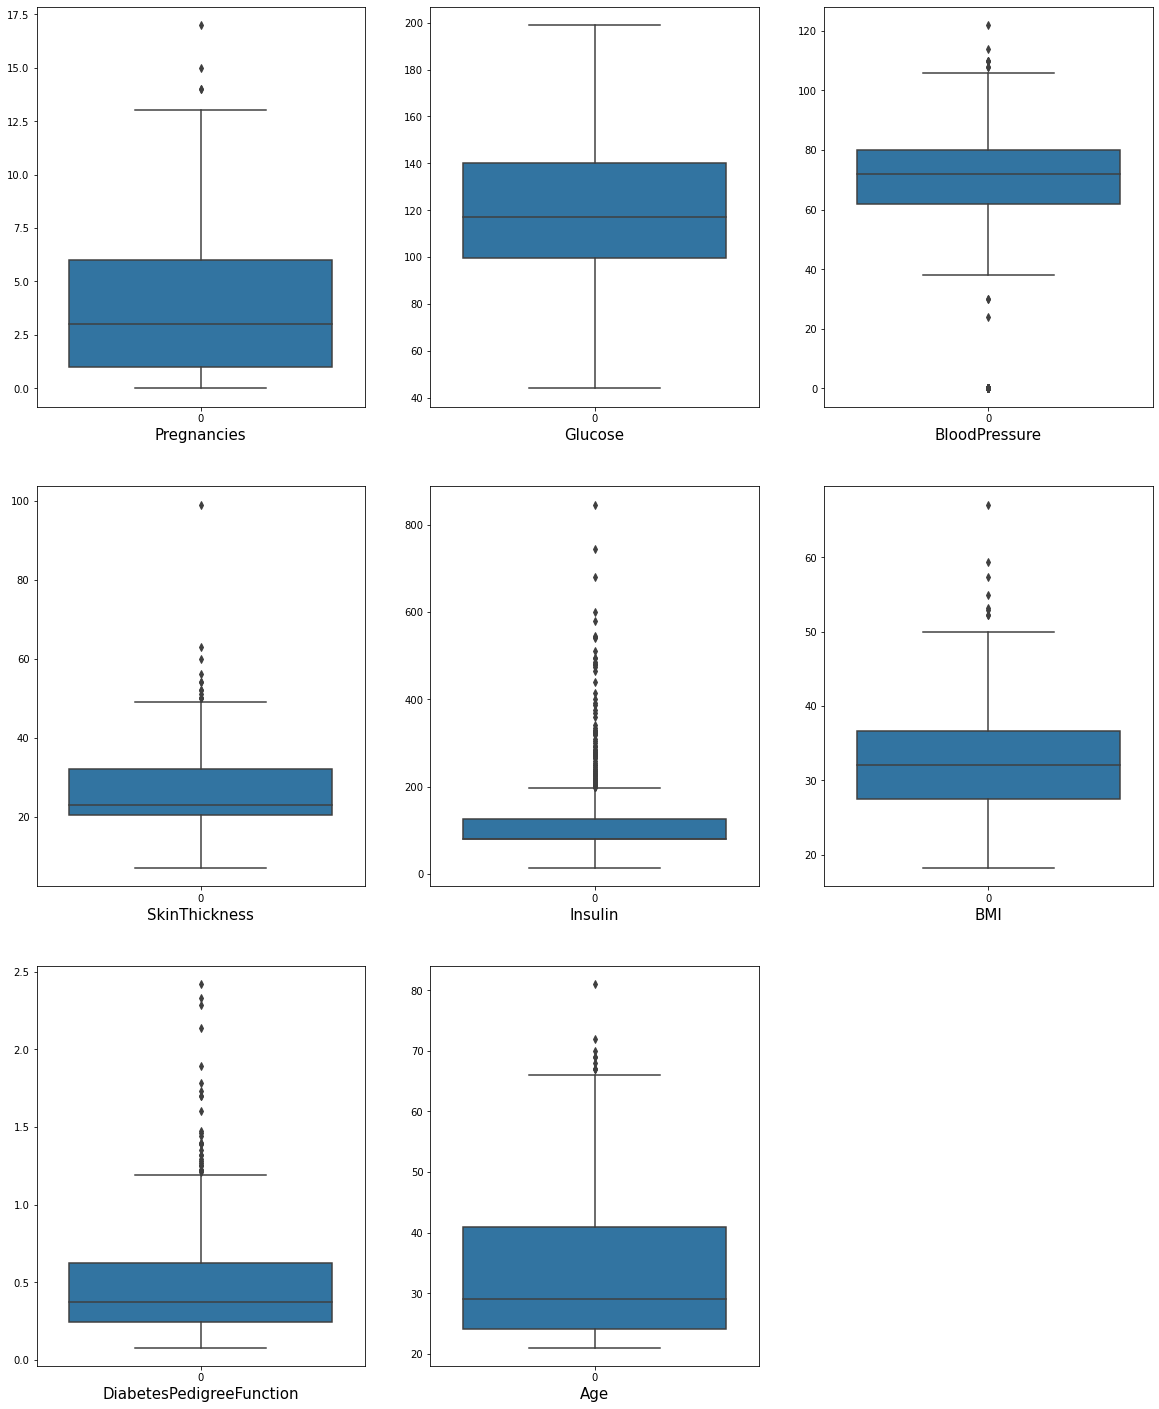

In [8]:
df_features = data.drop('Outcome', axis=1)
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)

    graph+=1
plt.show()

In [9]:
data.shape

(768, 9)

In [10]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

iqr=q3-q1


In [11]:
print(iqr)

Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               18.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382500
Age                         17.000000
Outcome                      1.000000
dtype: float64


In [12]:
preg_high=(q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [13]:
index=np.where(data['Pregnancies'] > preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [14]:

data=data.drop(data.index[index])
data.shape

(764, 9)

In [15]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_high=(q3.BloodPressure + (1.5 * iqr.BloodPressure))
bp_high


index=np.where(data['BloodPressure'] > bp_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
752,763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
753,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
754,765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
755,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [17]:
st_high=(q3.SkinThickness + (1.5 * iqr.SkinThickness))
st_high


index=np.where(data['SkinThickness'] > st_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
740,763,10,101.0,76,48.000000,180.000000,32.9,0.171,63,0
741,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
742,765,5,121.0,72,23.000000,112.000000,26.2,0.245,30,0
743,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [18]:
insu_high=(q3.SkinThickness + (1.5 * iqr.Insulin))
insu_high


index=np.where(data['Insulin'] > insu_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
506,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
507,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
508,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
509,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [19]:

bmi_high=(q3.BMI + (1.5 * iqr.BMI))
bmi_high


index=np.where(data['BMI'] > bmi_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
503,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
504,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
505,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
506,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [20]:
dpf_high=(q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
dpf_high


index=np.where(data['DiabetesPedigreeFunction'] > dpf_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
487,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
488,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
489,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
490,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [21]:
age_high=(q3.Age + (1.5 * iqr.Age))
age_high


index=np.where(data['Age'] > age_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
478,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
479,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
480,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
481,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [22]:
insu_high=(q3.Insulin + (1.5 * iqr.Insulin))
insu_high


index=np.where(data['Insulin'] > insu_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
478,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
479,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
480,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
481,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


In [23]:
bmi_high=(q3.BMI + (1.5 * iqr.BMI))
bmi_high


index=np.where(data['BMI'] > bmi_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()



dpf_high=(q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
dpf_high


index=np.where(data['DiabetesPedigreeFunction'] > dpf_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()

age_high=(q3.Age + (1.5 * iqr.Age))
age_high


index=np.where(data['Age'] > age_high)
index


data=data.drop(data.index[index])
data.shape
data.reset_index()



,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
478,761,9,170.0,74,31.000000,79.799479,44.0,0.403,43,1
479,762,9,89.0,62,20.536458,79.799479,22.5,0.142,33,0
480,764,2,122.0,70,27.000000,79.799479,36.8,0.340,27,0
481,766,1,126.0,60,20.536458,79.799479,30.1,0.349,47,1


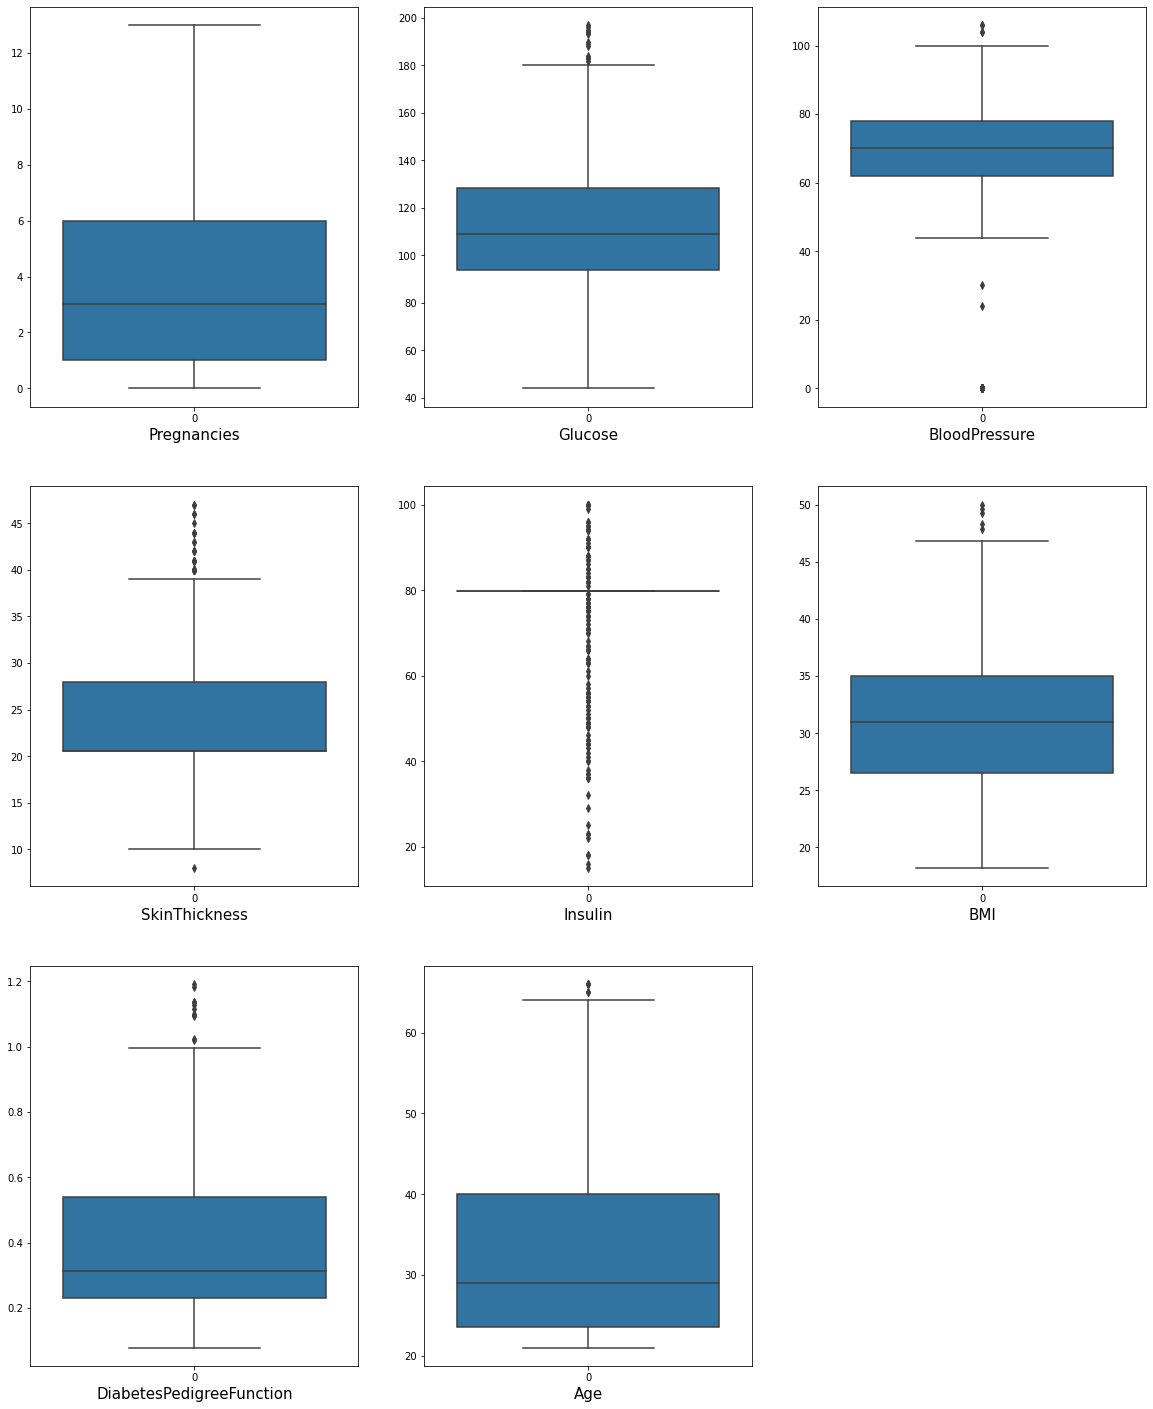

In [24]:
df_features = data.drop('Outcome', axis=1)
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=9:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)

    graph+=1
plt.show()

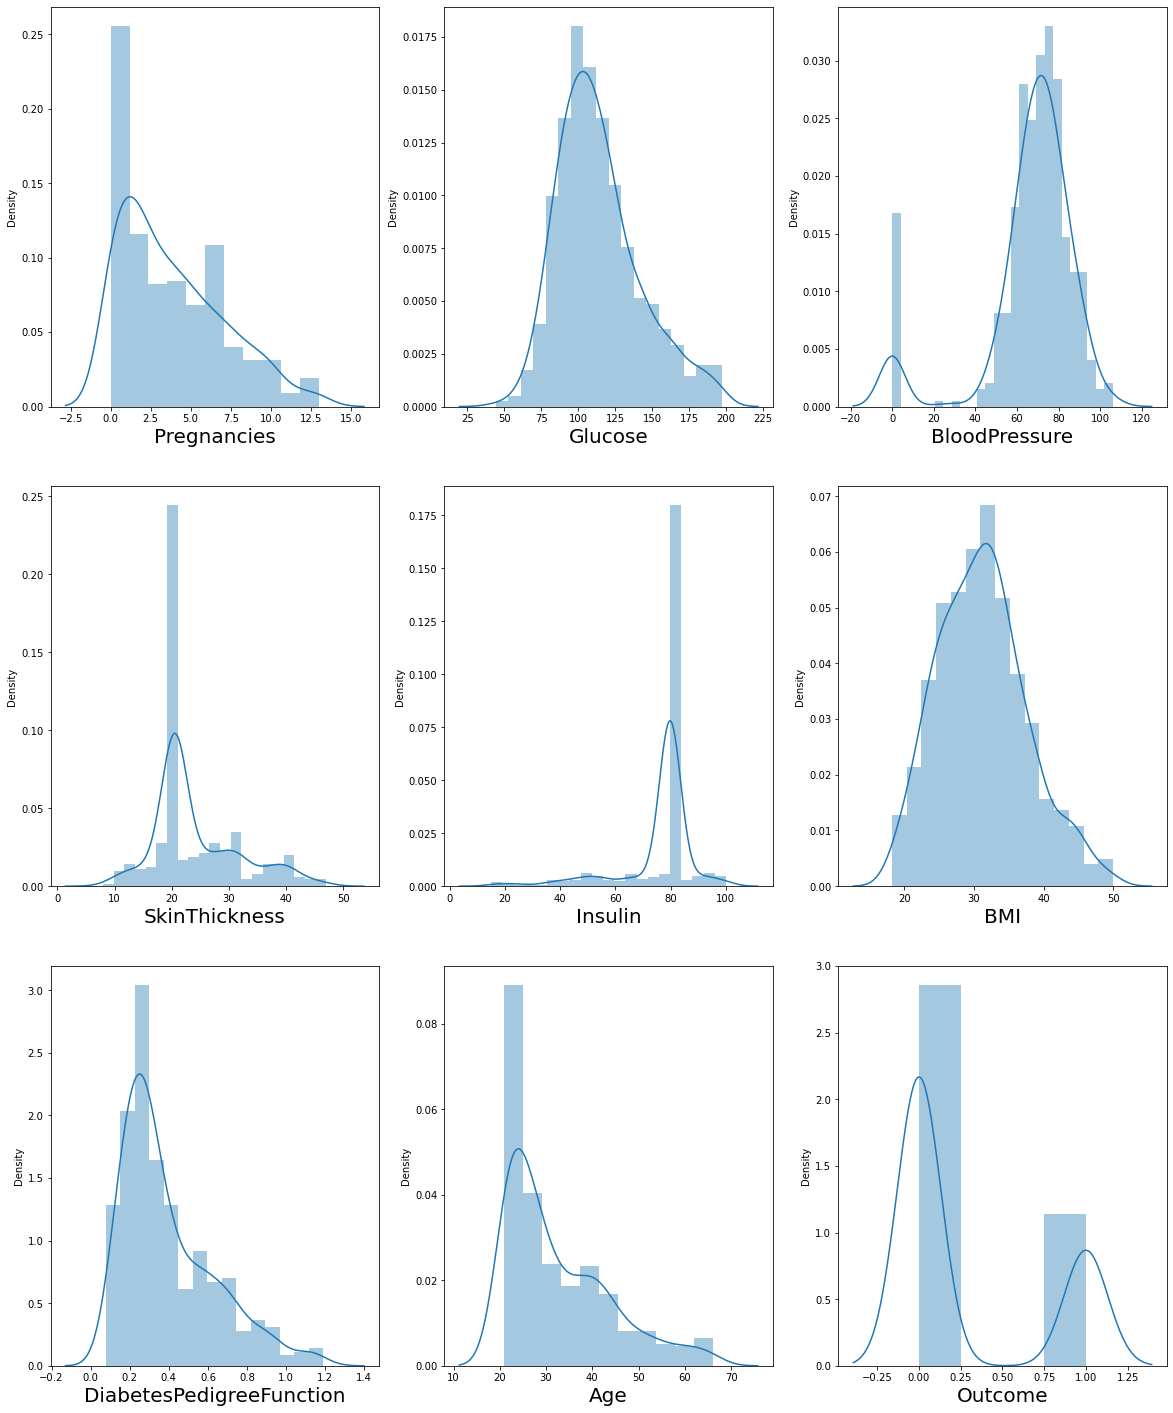

In [25]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [26]:
X = data.drop(columns = ['Outcome'])
Y = data['Outcome']

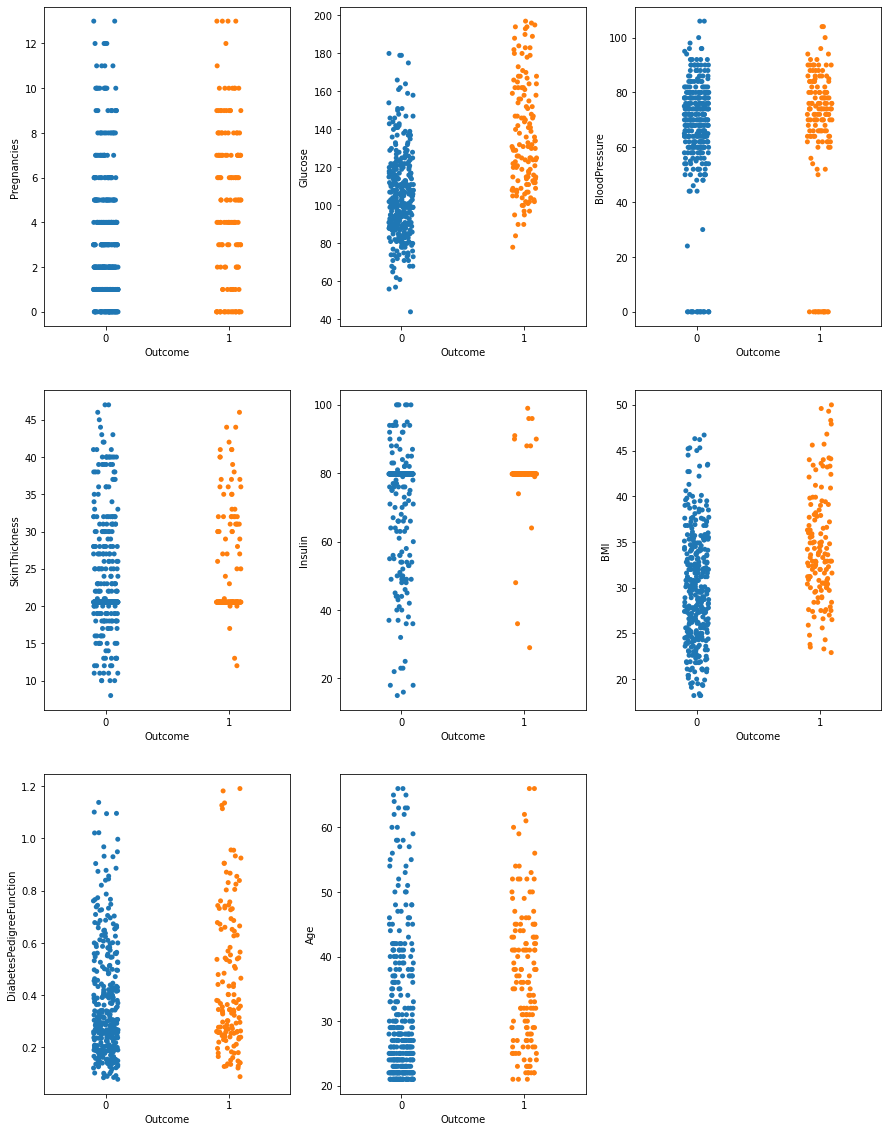

In [27]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(Y,X[column])
    plotnumber+=1
plt.show()

In [28]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [29]:
X_scaled.shape[1]

8

In [31]:

#finding variance inflation factor in each scaled column ie.e X_Scaled.shape[1] (1/(1-r2))

vif= pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

#VIF can only be done of features not on label(label are only used for observation)

,vif,Features
0,1.376855,Pregnancies
1,1.205936,Glucose
2,1.114638,BloodPressure
3,1.335585,SkinThickness
4,1.086109,Insulin
5,1.398475,BMI
6,1.024457,DiabetesPedigreeFunction
7,1.569292,Age


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25, random_state=355)

#upto this all these are preprocessing steps
#wehave done
#1. Expolatory Data Analysis (EDA)
#2. Correlation
#3. Multicorrelation problem
#4. Outliers detection
#5. Data Distribution


In [35]:
#upto this all these are preprocessing steps
#wehave done
#1. Expolatory Data Analysis (EDA)
#2. Correlation
#3. Multicorrelation problem
#4. Outliers detection
#5. Data Distribution


#Preprocessing steps completed 
#now model building

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
#let's see how well our model performs on the test the data set
y_pred = log_reg.predict(x_test)

In [37]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
#here 1=diabetec and 0=healthy
log_reg.predict_proba(x_test)



array([[0.84564822, 0.15435178],
       [0.28685709, 0.71314291],
       [0.79096765, 0.20903235],
       [0.88353178, 0.11646822],
       [0.87714052, 0.12285948],
       [0.86623436, 0.13376564],
       [0.67212595, 0.32787405],
       [0.81977165, 0.18022835],
       [0.9202309 , 0.0797691 ],
       [0.79921014, 0.20078986],
       [0.90848901, 0.09151099],
       [0.52060939, 0.47939061],
       [0.73417813, 0.26582187],
       [0.77926734, 0.22073266],
       [0.94001922, 0.05998078],
       [0.67261548, 0.32738452],
       [0.30518483, 0.69481517],
       [0.44988248, 0.55011752],
       [0.87394742, 0.12605258],
       [0.69254378, 0.30745622],
       [0.16913505, 0.83086495],
       [0.89309886, 0.10690114],
       [0.94521511, 0.05478489],
       [0.90053079, 0.09946921],
       [0.66295126, 0.33704874],
       [0.94580335, 0.05419665],
       [0.07960058, 0.92039942],
       [0.60140193, 0.39859807],
       [0.72762187, 0.27237813],
       [0.92299171, 0.07700829],
       [0.

In [41]:
#we have passes x_test for checking purpose 
#y_test are actual labels
#Model Accuracy - how good it is

accuracy = accuracy_score(y_test,y_pred)
#here actual label is to be first and then predicted label
accuracy


0.7851239669421488

In [42]:
#confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[77,  9],
       [17, 18]], dtype=int64)

In [43]:
((77+18)/(77+9+17+18))

0.7851239669421488

In [44]:
#similarly we can calculate recall/F1/Precision
#the classification report will give all recall/precision/F1 in one go
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        86
           1       0.67      0.51      0.58        35

    accuracy                           0.79       121
   macro avg       0.74      0.70      0.72       121
weighted avg       0.78      0.79      0.78       121



In [46]:
#ROC curve
fpr,tpr, thresholds=roc_curve(y_test,y_pred)

In [47]:
#thresholds[0] means no instances predicted(It should be read from 0 - max)
print('Threshold = ', thresholds)
print('True Positive Rate =',tpr)
print('Fals Positive Rate = ',fpr)

Threshold =  [2 1 0]
True Positive Rate = [0.         0.51428571 1.        ]
Fals Positive Rate =  [0.         0.10465116 1.        ]


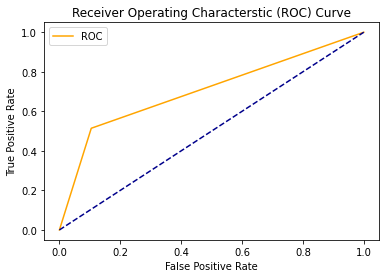

In [49]:
plt.plot(fpr,tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) Curve')
plt.legend()
plt.show()

In [50]:
#how much area it is covering (AUC)
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7048172757475084
